In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.mixture import GaussianMixture as gmm
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 차트 내 한글 및 마이너스 기호 표시를 위한 import
from matplotlib import rc
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')


from sklearn.preprocessing import MinMaxScaler

In [74]:
df = pd.read_csv("./통합데이터_추가수정(사업체수 추가).csv",encoding="cp949")
df.head()

,역사명,역위도,역경도,일평균승하차(명),상가 면적,거주자수,남여비율,1인 가구수 레벨,1인 가구수(세대),사업체수,20~40대 인구 수 레벨,고속버스 터미널,기차역,여객 터미널,주변 관광지,주변 대학교,일평균(원)
0,가야역,35.155883,129.042817,5799,11.0,25217,0.95,83,6291,49,57,NaN,1.0,NaN,0,0,1926082
1,감전역,35.155528,128.991146,6107,10.0,12825,1.12,56,5461,57,31,NaN,NaN,NaN,0,0,2535118
2,강서구청,35.211247,128.981756,4251,NaN,2076,1.22,26,4630,109,4,NaN,NaN,NaN,0,0,2029127
3,개금역,35.153284,129.020533,13621,37.0,27187,0.94,79,2501,36,65,NaN,NaN,NaN,0,1,4717075
4,거제(법원·검찰청),35.188589,129.073941,9546,16.0,27403,0.91,14,3093,114,13,NaN,NaN,NaN,0,1,3099526


In [75]:
param = np.array(df[['일평균승하차(명)', '남여비율', '1인 가구수(세대)','사업체수','거주자수','일평균(원)']])
len(param)

100

In [76]:
use_df = df[['역사명','일평균승하차(명)', '남여비율', '1인 가구수(세대)','사업체수','거주자수','일평균(원)']].dropna()
use_df.head()

,역사명,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원)
0,가야역,5799,0.95,6291,49,25217,1926082
1,감전역,6107,1.12,5461,57,12825,2535118
2,강서구청,4251,1.22,4630,109,2076,2029127
3,개금역,13621,0.94,2501,36,27187,4717075
4,거제(법원·검찰청),9546,0.91,3093,114,27403,3099526


In [77]:
use_df[['역사명','일평균승하차(명)', '남여비율', '1인 가구수(세대)','사업체수','거주자수','일평균(원)']].dropna()
use_df.head()

,역사명,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원)
0,가야역,5799,0.95,6291,49,25217,1926082
1,감전역,6107,1.12,5461,57,12825,2535118
2,강서구청,4251,1.22,4630,109,2076,2029127
3,개금역,13621,0.94,2501,36,27187,4717075
4,거제(법원·검찰청),9546,0.91,3093,114,27403,3099526


### 정규화(minmaxscaler)

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [40]:
param.max()

57826.0

In [41]:
param.min()

0.84

In [72]:
param

array([[5.7990000e+03, 9.5000000e-01, 6.2910000e+03, 1.9260820e+06],
       [6.1070000e+03, 1.1200000e+00, 5.4610000e+03, 2.5351180e+06],
       [4.2510000e+03, 1.2200000e+00, 4.6300000e+03, 2.0291270e+06],
       [1.3621000e+04, 9.4000000e-01, 2.5010000e+03, 4.7170750e+06],
       [9.5460000e+03, 9.1000000e-01, 3.0930000e+03, 3.0995260e+06],
       [2.4395000e+04, 9.6000000e-01, 3.6940000e+03, 1.0345206e+07],
       [1.6701000e+04, 8.6000000e-01, 2.4240000e+03, 6.9327810e+06],
       [1.5271000e+04, 9.3000000e-01, 4.8350000e+03, 5.1032980e+06],
       [2.2544000e+04, 9.3000000e-01, 3.7610000e+03, 6.6560750e+06],
       [7.0210000e+03, 1.0400000e+00, 2.0290000e+03, 2.8483240e+06],
       [5.1850000e+03, 1.0200000e+00, 3.0350000e+03, 1.6707590e+06],
       [1.5857000e+04, 9.1000000e-01, 2.7740000e+03, 6.9334450e+06],
       [5.5300000e+03, 1.0000000e+00, 1.7330000e+03, 4.0809590e+06],
       [8.2480000e+03, 9.8000000e-01, 1.7520000e+03, 1.3187020e+06],
       [3.8810000e+03, 9.3000000e-

In [73]:
scaler = MinMaxScaler()
scaler.fit(param)
df_scaled = scaler.transform(param)

In [74]:
# minmaxscaler
df_scaled

array([[0.09486778, 0.03197674, 0.77994171, 0.04680149],
       [0.10022617, 0.08139535, 0.6699788 , 0.06229773],
       [0.06793667, 0.11046512, 0.55988341, 0.04942335],
       [0.2309499 , 0.02906977, 0.27782194, 0.1178152 ],
       [0.16005567, 0.02034884, 0.35625331, 0.07665846],
       [0.418389  , 0.03488372, 0.43587705, 0.26101673],
       [0.28453375, 0.00581395, 0.26762056, 0.17419137],
       [0.25965553, 0.02616279, 0.58704293, 0.12764221],
       [0.3861865 , 0.02616279, 0.44475358, 0.1671509 ],
       [0.11612735, 0.05813953, 0.21528882, 0.07026691],
       [0.0841858 , 0.05232558, 0.34856916, 0.04030508],
       [0.26985038, 0.02034884, 0.31399046, 0.17420827],
       [0.09018789, 0.04651163, 0.17607313, 0.10162994],
       [0.1374739 , 0.04069767, 0.17859036, 0.03134738],
       [0.06149965, 0.02616279, 0.32101219, 0.12358384],
       [0.19354558, 0.00290698, 0.17024377, 0.02263366],
       [0.04723382, 0.04069767, 0.        , 0.01568618],
       [0.15365344, 0.03197674,

In [83]:
use_df.set_index(use_df["역사명"], inplace=True)

In [84]:
a = use_df.copy()
a

,역사명,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원)
역사명,,,,,,,
가야역,가야역,5799,0.95,6291,49,25217,1926082
감전역,감전역,6107,1.12,5461,57,12825,2535118
강서구청,강서구청,4251,1.22,4630,109,2076,2029127
개금역,개금역,13621,0.94,2501,36,27187,4717075
거제(법원·검찰청),거제(법원·검찰청),9546,0.91,3093,114,27403,3099526
...,...,...,...,...,...,...,...
충렬사(안락),충렬사(안락),5398,0.94,1851,35,18134,1117126
토성,토성,13846,0.94,2110,7,28882,6002230
하단,하단,29080,1.00,4414,36,21407,11010043


In [85]:
a.drop(columns="역사명",inplace=True)

In [115]:
#a[['일평균승하차(명)', '남여비율', '1인 가구수(세대)','사업체수','일평균(원)']] = use_df

ValueError: Columns must be same length as key

In [179]:
a

,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원)
역사명,,,,,,
가야역,5799,0.95,6291,49,25217,1926082
감전역,6107,1.12,5461,57,12825,2535118
강서구청,4251,1.22,4630,109,2076,2029127
개금역,13621,0.94,2501,36,27187,4717075
거제(법원·검찰청),9546,0.91,3093,114,27403,3099526
...,...,...,...,...,...,...
충렬사(안락),5398,0.94,1851,35,18134,1117126
토성,13846,0.94,2110,7,28882,6002230
하단,29080,1.00,4414,36,21407,11010043


### GMM

In [86]:
gm = gmm(n_components=3,random_state=42)
labels = gm.fit_predict(a)

In [87]:
for i in range(0,3):
    print(np.count_nonzero(labels == i))

74
5
21


In [88]:
labels

array([0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0], dtype=int64)

In [89]:
a['group'] = labels
a.head()

,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원),group
역사명,,,,,,,
가야역,5799,0.95,6291,49,25217,1926082,0
감전역,6107,1.12,5461,57,12825,2535118,0
강서구청,4251,1.22,4630,109,2076,2029127,2
개금역,13621,0.94,2501,36,27187,4717075,0
거제(법원·검찰청),9546,0.91,3093,114,27403,3099526,0


In [90]:
a[a['group']==2]

,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원),group
역사명,,,,,,,
강서구청,4251,1.22,4630,109,2076,2029127,2
교대,22544,0.93,3761,0,9487,6656075,2
구포,5530,1.00,1733,54,7059,4080959,2
국금융센터·부산은행역,8248,0.98,1752,0,4145,1318702,2
금곡역,3881,0.93,2827,13,12279,4943795,2
금련산역,11471,0.85,1689,102,23430,976234,2
남포,28802,1.25,1762,12,1355,9296111,2
노포,19370,0.95,5628,6,4858,6881813,2
대저,12374,1.22,3047,109,2076,3654660,2


In [91]:
a[a['group']==1]

,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원),group
역사명,,,,,,,
부산대,24167,0.92,3939,70,34792,13975371,1
사상역,33585,1.07,2003,18,22656,14117468,1
서면역,57826,0.94,4449,380,40014,39388852,1
센텀시티역,28867,0.91,4259,26,15117,14421978,1
연산,30035,0.91,3420,342,22684,15742971,1


In [92]:
a[a['group']==0]

,일평균승하차(명),남여비율,1인 가구수(세대),사업체수,거주자수,일평균(원),group
역사명,,,,,,,
가야역,5799,0.95,6291,49,25217,1926082,0
감전역,6107,1.12,5461,57,12825,2535118,0
개금역,13621,0.94,2501,36,27187,4717075,0
거제(법원·검찰청),9546,0.91,3093,114,27403,3099526,0
경성부경대역,24395,0.96,3694,83,32821,10345206,0
...,...,...,...,...,...,...,...
초량,10253,0.95,2155,104,16992,4676165,0
충렬사(안락),5398,0.94,1851,35,18134,1117126,0
토성,13846,0.94,2110,7,28882,6002230,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


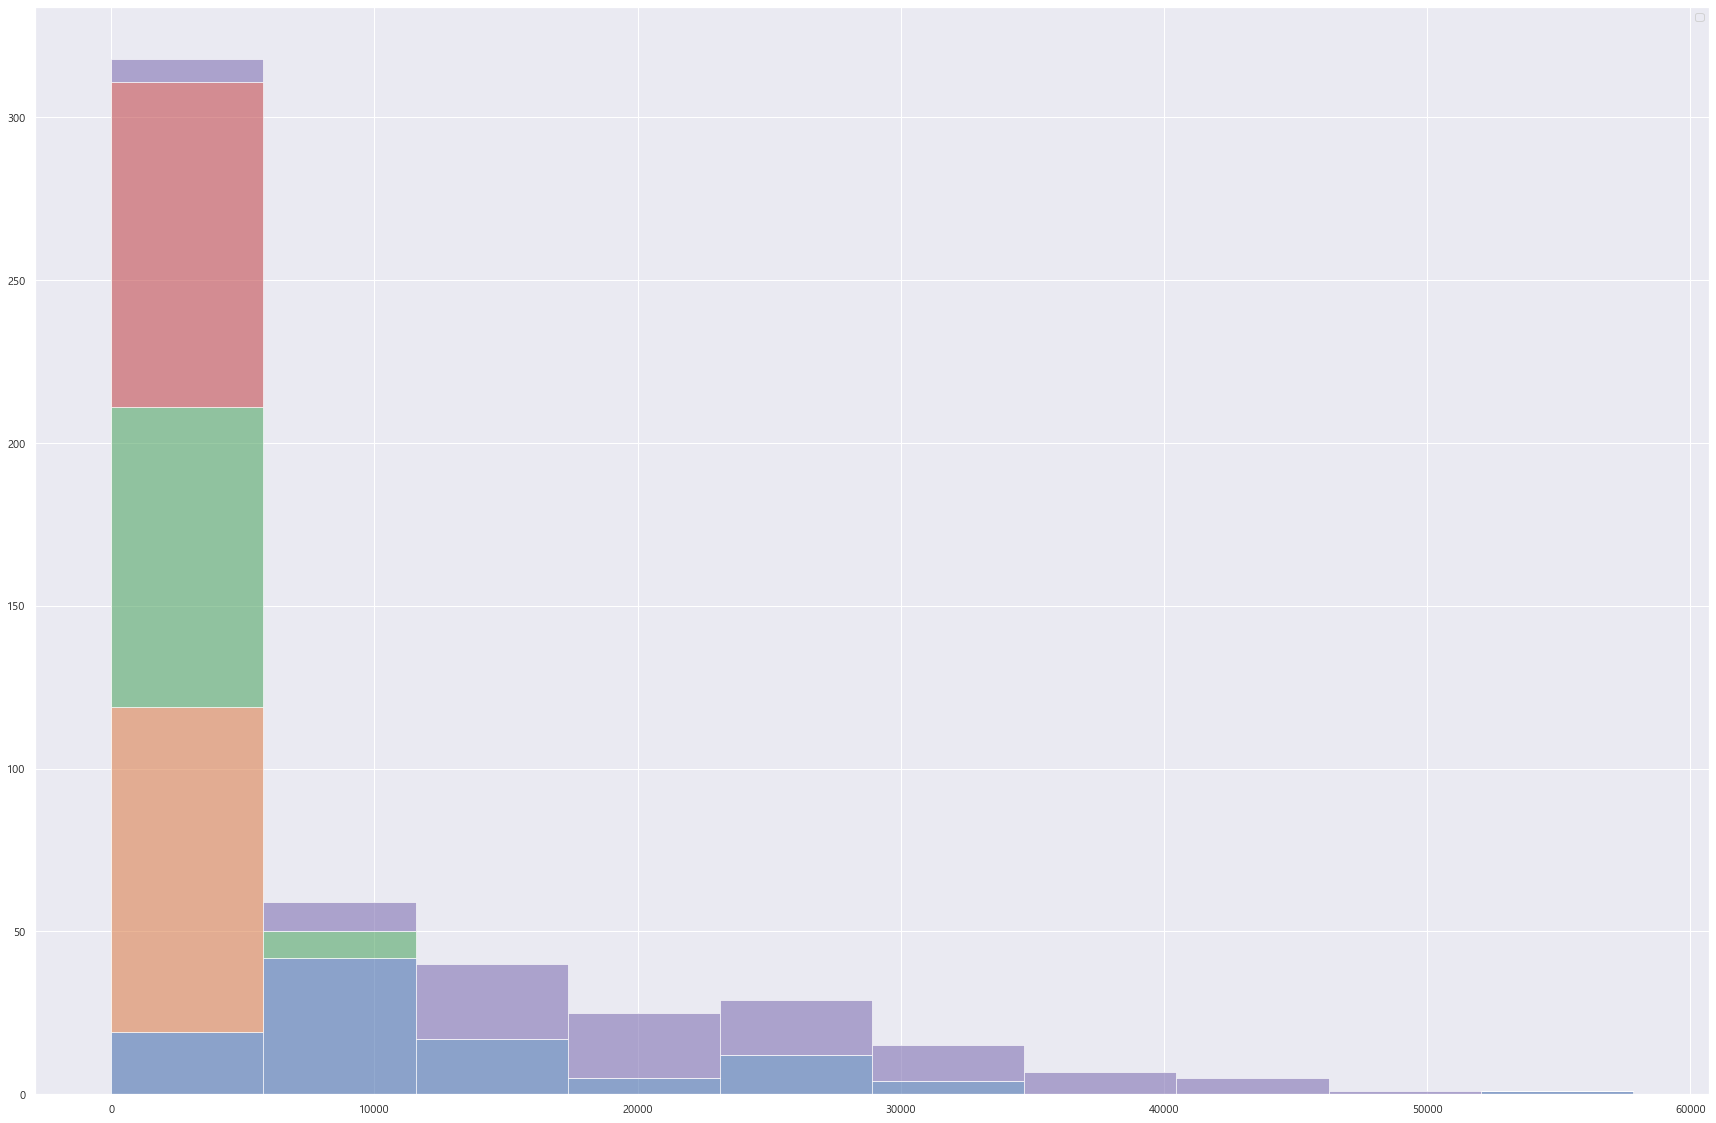

In [61]:
plt.figure(figsize=(30,20))


plt.hist((a.iloc[:,0], a.iloc[:,1], a.iloc[:,2], a.iloc[:,3],a.iloc[:,4]
         ), density=False, alpha=0.6, histtype='barstacked')
plt.legend()
# plt.hist(x = a.iloc[:,0], alpha=0.6, histtype='stepfilled')
# plt.hist(x = a.iloc[:,1], alpha=0.6, histtype='stepfilled')
# plt.hist(x = a.iloc[:,2], alpha=0.6, histtype='stepfilled')
# plt.hist(x = a.iloc[:,3], alpha=0.6, histtype='stepfilled')
# plt.hist(x = a.iloc[:,4], alpha=0.6, histtype='stepfilled')




# plt.subplot(151)    
# sns.scatterplot(x=a.iloc[:,0], y=a.iloc[:,5], data=a, hue=labels, palette='bright', s= 100) #
# #plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

# plt.subplot(152)
# sns.scatterplot(x=a.iloc[:,1], y=a.iloc[:,5], data=a, hue=labels, palette='bright', s= 100) #
# #plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

# plt.subplot(153)  
# sns.scatterplot(x=a.iloc[:,2], y=a.iloc[:,5], data=a, hue=labels, palette='bright', s= 100) #
# #plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

# plt.subplot(154)  
# sns.scatterplot(x=a.iloc[:,3], y=a.iloc[:,5], data=a, hue=labels, palette='bright', s= 100) #
# #plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

# plt.subplot(155)
# sns.scatterplot(x=a.iloc[:,4], y=a.iloc[:,5], data=a, hue=labels, palette='bright', s= 100) #
# #plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.show()

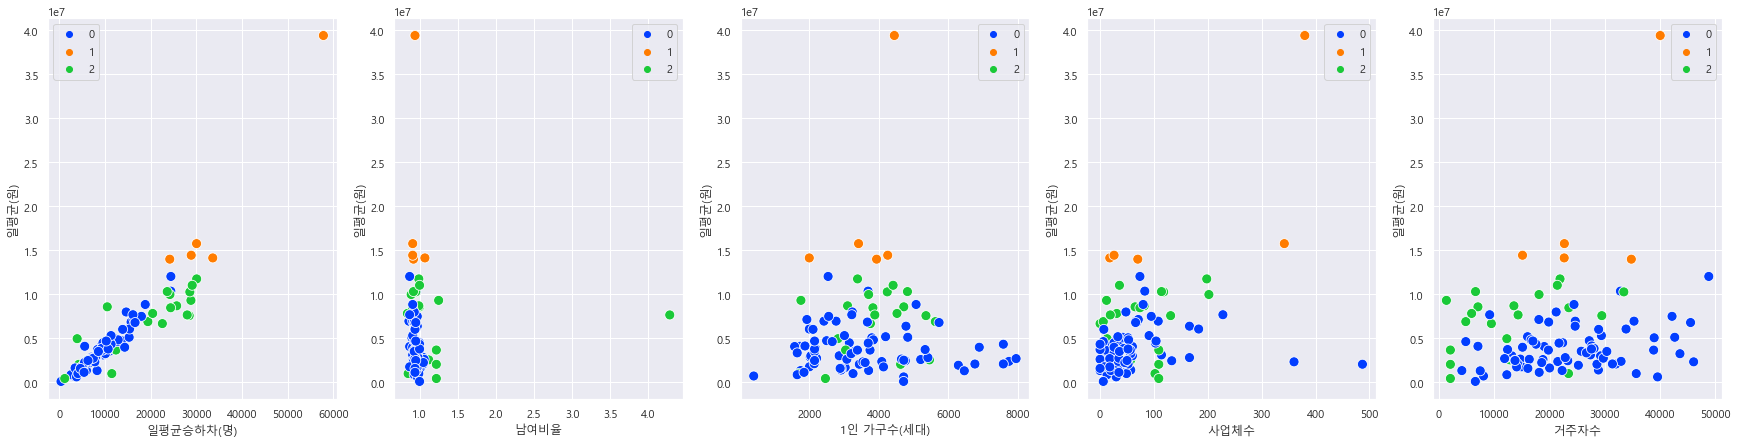

In [259]:
plt.figure(figsize=(30,7))

#X= a

plt.subplot(151)    
sns.scatterplot(x=a.iloc[:,0], y=a.iloc[:,5], data=a, hue=labels, palette='bright', s= 100) #
#plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(152)
sns.scatterplot(x=a.iloc[:,1], y=a.iloc[:,5], data=a, hue=labels, palette='bright', s= 100) #
#plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.subplot(153)  
sns.scatterplot(x=a.iloc[:,2], y=a.iloc[:,5], data=a, hue=labels, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(154)  
sns.scatterplot(x=a.iloc[:,3], y=a.iloc[:,5], data=a, hue=labels, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(155)
sns.scatterplot(x=a.iloc[:,4], y=a.iloc[:,5], data=a, hue=labels, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.show()

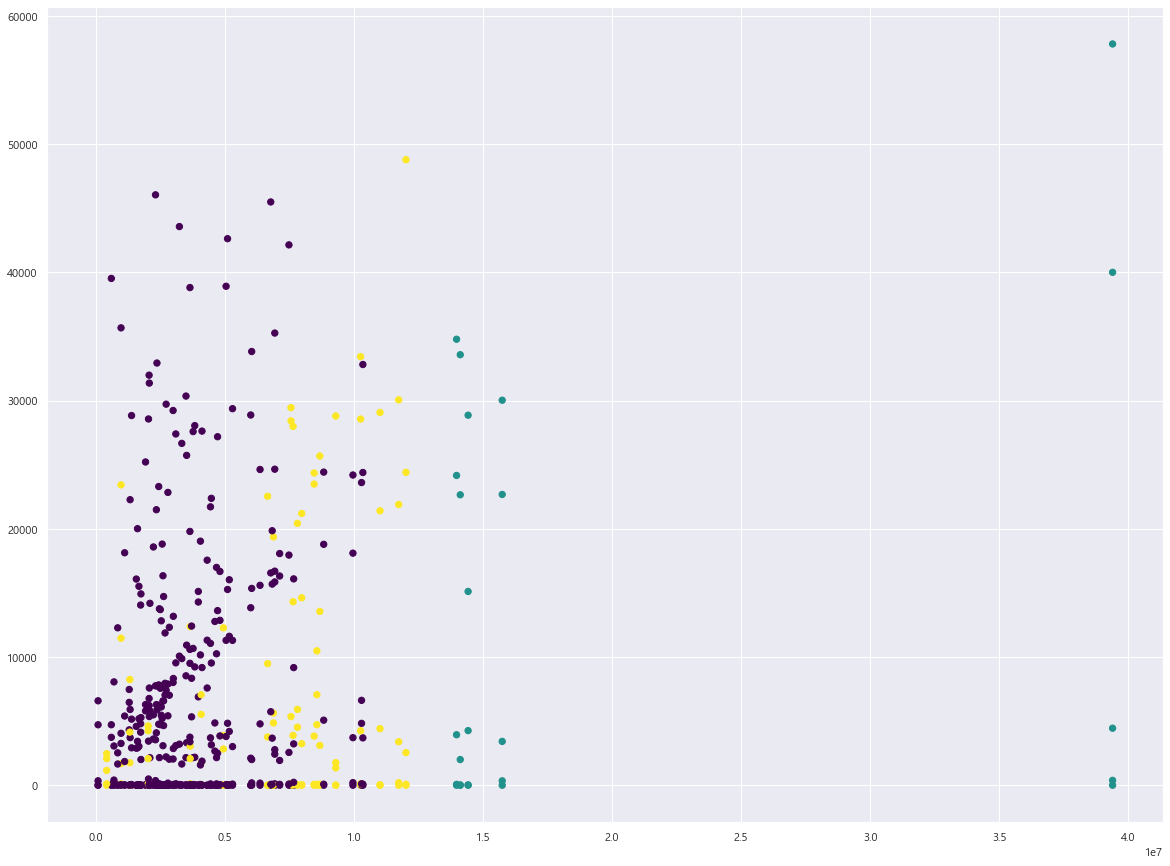

In [190]:
plt.figure(figsize=(20,15))

plt.scatter(a['일평균(원)'], a['일평균승하차(명)'], c=labels, s=40, cmap='viridis');
plt.scatter(a['일평균(원)'], a['남여비율'], c=labels, s=40, cmap='viridis');
plt.scatter(a['일평균(원)'], a['1인 가구수(세대)'], c=labels, s=40, cmap='viridis');
plt.scatter(a['일평균(원)'], a['사업체수'], c=labels, s=40, cmap='viridis');
plt.scatter(a['일평균(원)'], a['거주자수'], c=labels, s=40, cmap='viridis');
plt.show()

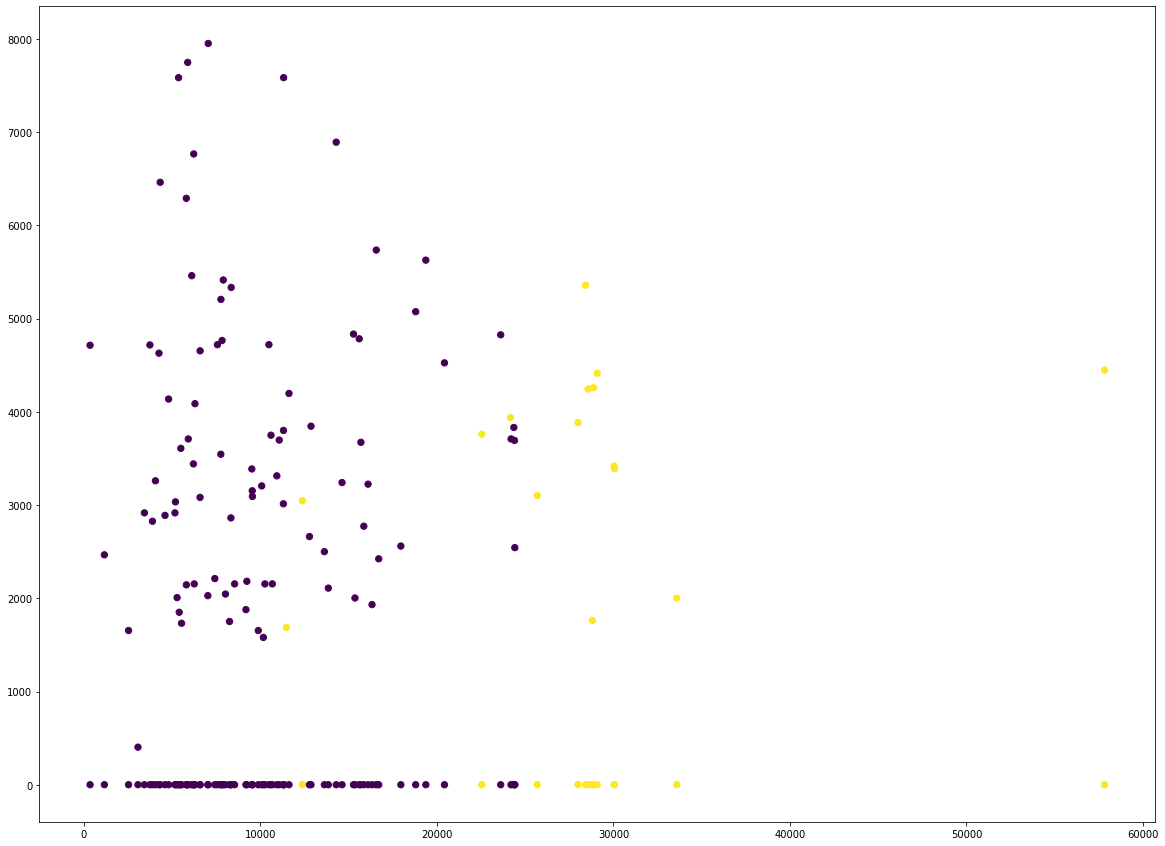

In [96]:
plt.figure(figsize=(20,15))

plt.scatter(use_df['일평균승하차(명)'], use_df['남여비율'], c=labels, s=40, cmap='viridis');
plt.scatter(use_df['일평균승하차(명)'], use_df['1인 가구수(세대)'], c=labels, s=40, cmap='viridis');
plt.show()

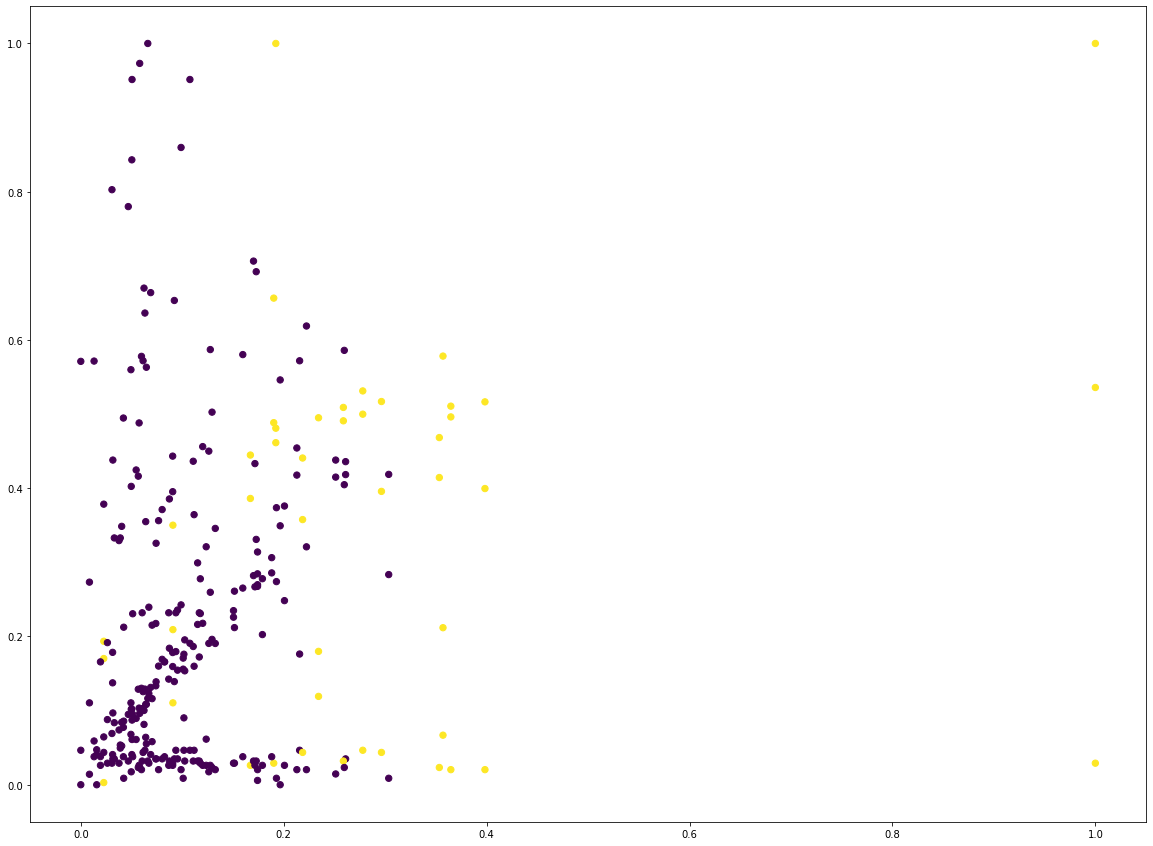

In [97]:
plt.figure(figsize=(20,15))

plt.scatter(a['일평균(원)'], a['일평균승하차(명)'], c=labels, s=40, cmap='viridis');
plt.scatter(a['일평균(원)'], a['남여비율'], c=labels, s=40, cmap='viridis');
plt.scatter(a['일평균(원)'], a['1인 가구수(세대)'], c=labels, s=40, cmap='viridis');
plt.show()

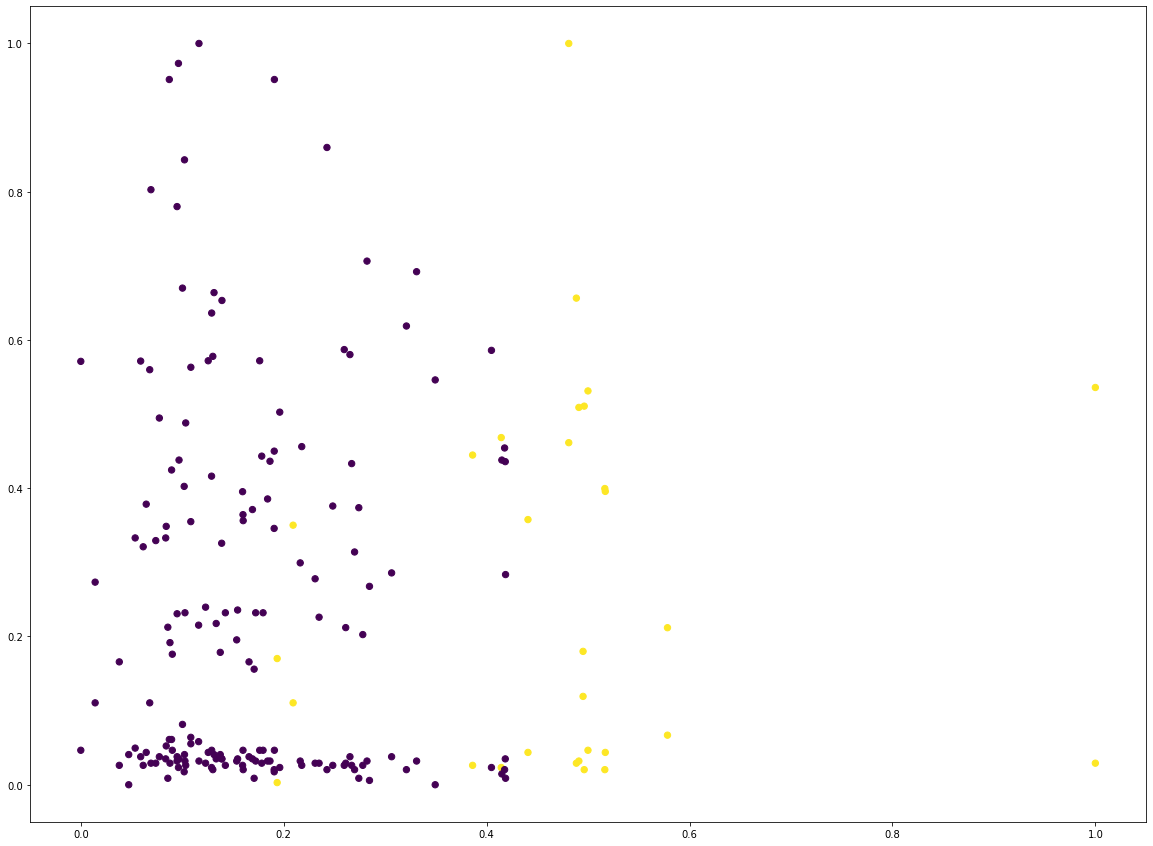

In [98]:
plt.figure(figsize=(20,15))

plt.scatter(a['일평균승하차(명)'], a['남여비율'], c=labels, s=40, cmap='viridis');
plt.scatter(a['일평균승하차(명)'], a['1인 가구수(세대)'], c=labels, s=40, cmap='viridis');
plt.show()

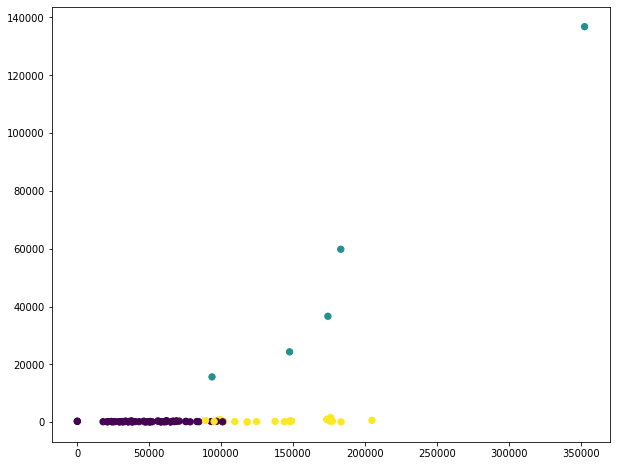

In [55]:
업장수 = plt.figure(figsize=(10,8))

업장수 = plt.scatter(use_df['유동인구'], use_df['업장수'], c=labels, s=40, cmap='viridis');

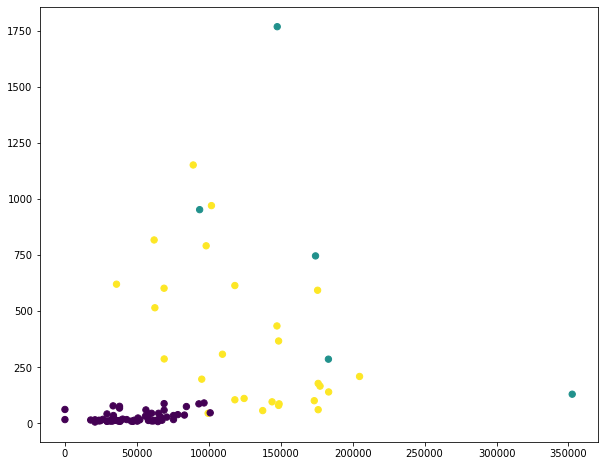

In [56]:
전체_상가_면적 = plt.figure(figsize=(10,8))

전체_상가_면적 = plt.scatter(use_df['유동인구'], use_df['전체 상가 면적'], c=labels, s=40, cmap='viridis');
# 면적구간 필요

In [39]:
use_df

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수,group
0,다대포해수욕장,다대1동,37932,345,68.0,38523,2
1,다대포항,다대1동,37932,345,76.0,38523,2
2,낫개,다대2동,50774,246,24.0,26678,0
3,신장림,장림2동,33475,302,78.0,27244,2
4,장림,장림2동,33475,302,24.0,27244,0
...,...,...,...,...,...,...,...
95,서동,서2동,24707,102,12.0,8999,0
97,반여농산물시장,반송1동,29243,159,42.0,13982,0
98,석대,반송1동,29243,159,10.0,13982,0
99,영산대,반송1동,29243,159,9.0,13982,0


In [22]:
rank = pd.read_csv("./종합_점수_계산_가중치_x (1).csv", index_col=0, encoding="cp949")
rank.head()

,역사명,동별,역위도,역경도,총 상가 수,공실 상가 수,전체 상가 면적,공실 상가 면적,일평균승하차 레벨,업장수 레벨,1인 가구수 레벨,20~40대 인구 수 레벨,고속버스 터미널,환승,기차역,여객 터미널,주변 관광지,주변 대학교,종합점수
0,사상,괘법동,35.162361,128.984621,6.0,0.0,209.0,0.0,99,89,100,95,1.0,0.0,1.0,0.0,0,1,103.50
1,부전,부전1동,35.162587,129.062952,3.0,2.0,101.0,70.0,93,92,94,72,0.0,0.0,1.0,0.0,4,1,95.25
2,미남,온천3동,35.205503,129.068061,11.0,0.0,952.0,0.0,73,95,94,99,0.0,1.0,0.0,0.0,0,0,92.75
3,전포,전포1동,35.153102,129.065374,33.0,11.0,1151.0,422.0,71,88,93,98,0.0,0.0,0.0,0.0,2,1,92.50
4,온천장,온천1동,35.220249,129.086437,10.0,0.0,367.0,0.0,88,67,91,88,0.0,0.0,0.0,0.0,0,1,86.00


In [24]:
rank_weight = rank[["역사명", "종합점수"]]
rank_weight.head()

,역사명,종합점수
0,사상,103.50
1,부전,95.25
2,미남,92.75
3,전포,92.50
4,온천장,86.00


In [29]:
merge_rank1 = pd.merge(rank_weight, use_df, how="inner", on="역사명")
merge_rank1.head(20)

,역사명,종합점수,동별,유동인구,업장수,전체 상가 면적,전체인구수,group
0,사상,103.50,괘법동,204786,653,209.0,23641,2
1,부전,95.25,부전1동,173304,973,101.0,15989,2
2,미남,92.75,온천3동,93628,15667,952.0,38172,1
3,전포,92.50,전포1동,89158,597,1151.0,21585,2
4,온천장,86.00,온천1동,148518,318,367.0,22605,2
5,서면,85.25,부전2동,352597,136818,130.0,10868,1
6,센텀시티,84.00,우2동,176018,1586,178.0,30878,2
7,연산,83.00,연산4동,183140,59838,286.0,16006,1
8,하단,82.75,하단1동,177317,374,166.0,21583,2
9,부산대,81.25,장전2동,147359,422,434.0,27106,2


In [31]:
merge_rank2 = pd.merge(use_df, rank_weight, how="inner", on="역사명")
merge_rank2.head(20)

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수,group,종합점수
0,다대포해수욕장,다대1동,37932,345,68.0,38523,0,76.25
1,다대포항,다대1동,37932,345,76.0,38523,0,73.75
2,신장림,장림2동,33475,302,78.0,27244,0,56.25
3,신평,신평2동,68987,177,287.0,17887,2,46.50
4,하단,하단1동,177317,374,166.0,21583,2,82.75
5,괴정,괴정1동,93115,234,87.0,19074,0,54.25
6,토성,충무동,84426,181,75.0,10072,0,48.75
7,자갈치,남포동,175621,391,593.0,1124,2,49.50
8,중앙,중앙동,98152,734,791.0,3669,2,50.25
9,부산,초량1동,183298,102,140.0,5867,2,37.25
